<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/L5_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 5

Caleb Anderson

23 November 2024

#   <font color='Green'> **Setup** </font>

In [1350]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt, zeros, ones, array, sin, cos
from numpy import sum as Σ
import textwrap

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)):
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt)

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt
        a_told    = a_tnew

    return x_t, v_t, f_t

## <font color='Green'> **example** </font>

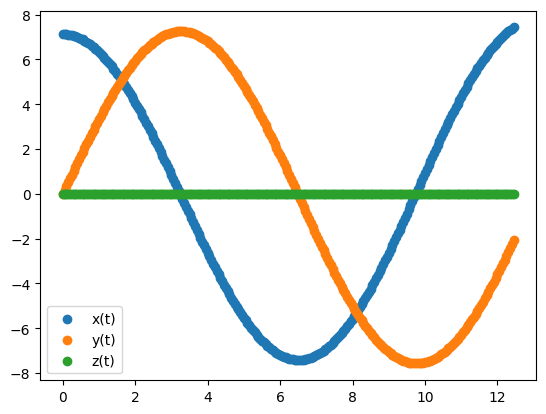

In [1351]:
t  = arange(0, 12.5, 0.05) ## time-array (collection of all time-points measured by detector)
x0 = array([7.1234,0.,0.]) ## start solely on the 0-axis
v0 = array([0.,3.4567,0.]) ## initial-velocity (needed for rotational motion) on 1-axis

x_t, v_t, f_t = VelocityVerletRot(t, x0=x0, v0=v0) ## using my method for rotational-motion (defined above)

plt.scatter(t, x_t[:,0], label = "x(t)") ## 0-axis plot
plt.scatter(t, x_t[:,1], label = "y(t)") ## 1-axis plot
plt.scatter(t, x_t[:,2], label = "z(t)") ## 2-axis plot
plt.legend(loc="best")
plt.show()

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

In [1352]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

x0 = array([10.,0.,0.])
v0 = array([0.,10.,0.])

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

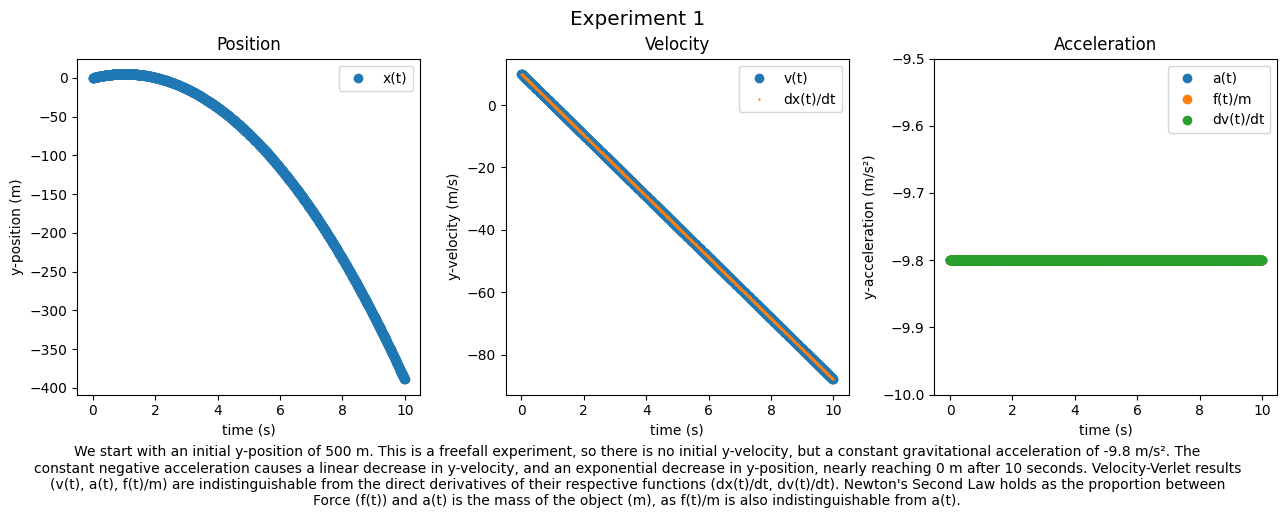

In [1353]:
m = 10
g = - 9.8
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,1] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.text(1, 1, "Experiment 1", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.23)
caption = "We start with an initial y-position of 500 m. This is a freefall experiment, so there is no initial y-velocity,"\
            " but a constant gravitational acceleration of -9.8 m/s\u00b2. The constant negative acceleration causes a linear decrease in y-velocity,"\
            " and an exponential decrease in y-position, nearly reaching 0 m after 10 seconds. Velocity-Verlet results (v(t), a(t), f(t)/m) are indistinguishable"\
            " from the direct derivatives of their respective functions (dx(t)/dt, dv(t)/dt). Newton's Second Law holds as the proportion between Force (f(t))"\
            " and a(t) is the mass of the object (m), as f(t)/m is also indistinguishable from a(t)."
caption_wrapped = textwrap.fill(caption, width=175)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, R_tx[:,1], label="x(t)")
ax1.set_title("Position")
ax1.legend(loc="upper right")
ax1.set(xlabel='time (s)', ylabel='y-position (m)')

ax2.scatter(T, V_tx[:,1], label="v(t)")
ax2.scatter(T, dRdt_tx[:,1], s=0.5, label="dx(t)/dt")
ax2.set_title("Velocity")
ax2.legend(loc="upper right")
ax2.set(xlabel='time (s)', ylabel='y-velocity (m/s)')

ax3.scatter(T, A_tx[:,1], label="a(t)")
ax3.scatter(T, f_gravity[:,1]/m, label="f(t)/m")
ax3.scatter(T, dVdt_tx[:,1], label="dv(t)/dt")
ax3.set_ylim(-10,-9.5)
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='y-acceleration (m/s\u00b2)')

fig.show()

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

In [1354]:
r_t = np.zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = np.zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = np.zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

r_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(r_t[0])**2) * ( r_t[0] - np.zeros(3) )
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  r_t[t] = r_t[t-1] + v_t[t-1] * dt + 0.5 * a_t[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = -np.dot( v_t[t-1], v_t[t-1]) / (np.linalg.norm(r_t[t-1])**2) * ( r_t[t-1] - np.zeros(3) )
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure in include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

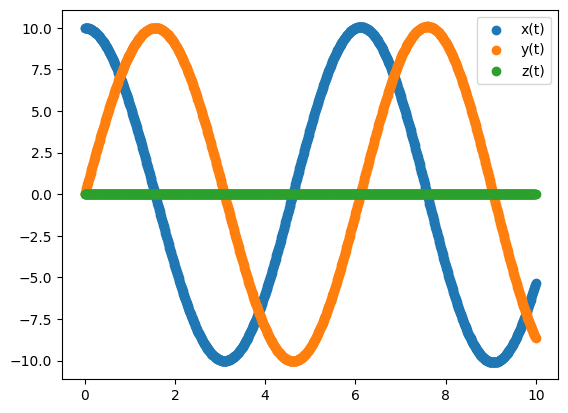

In [1355]:
plt.scatter(T, r_t[:,0], label = "x(t)") ## 0-axis plot
plt.scatter(T, r_t[:,1], label = "y(t)") ## 1-axis plot
plt.scatter(T, r_t[:,2], label = "z(t)") ## 2-axis plot
plt.legend(loc="best")
plt.show()

###   <font color='Red'> Plot a parametric plot with x and y </font>

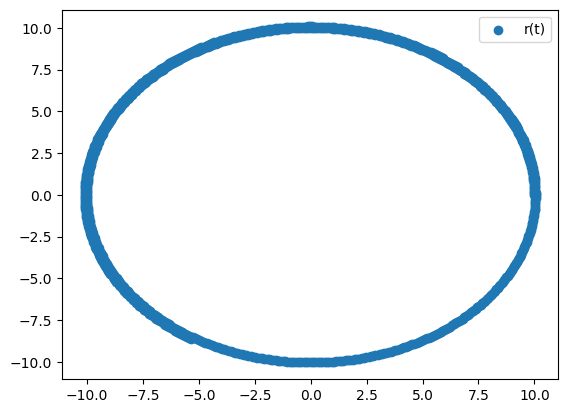

In [1356]:
plt.scatter(r_t[:,0], r_t[:,1], label = "r(t)") ## 0-axis plot
plt.legend(loc="best")
plt.show()

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implment the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [1357]:
m = 5
r = 10

speed = np.random.random(10000)
force = np.zeros(len(speed))

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

In [1358]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

In [1359]:
class Experiment: # Define a class for your experiment
    def __init__(self, attribute):
        self.attribute = attribute # Assign attribute in the constructor
        self.output = None # Initialize output

    def run(self):
        self.output = self.attribute

for i in range(len(speed)):
    experiment = Experiment(speed[i])  # Create an instance of your Experiment class
    experiment.run()  # Run the experiment
    force[i] = (m / r) * (experiment.output)**2  # Access the output and calculate force

#### <font color='Red'> Plot your data: F vs. v </font>

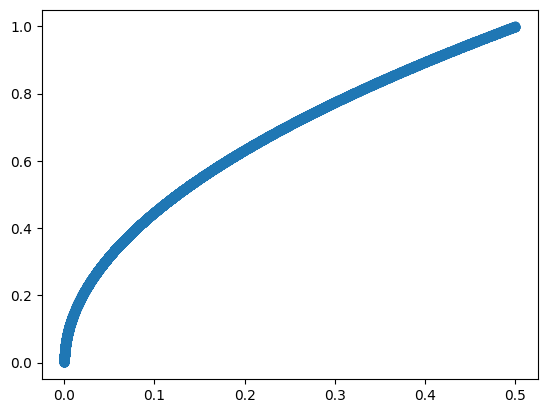

In [1360]:
plt.scatter(force, speed)
plt.show()

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [1361]:
def linearfit(x,y):
  A = np.vstack([x, np.ones(len(x))]).T
  return np.linalg.lstsq(A, y)[0]

lineararray = linearfit(speed**2, force)


<ipython-input-1361-3adfafcdeb36>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, y)[0]


### <font color='Red'> Get the theoritical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

In [1362]:
print("Theoretical mass/R = " + str(m/r) + " kg/m")
print("Experimental mass/R = " + str(lineararray[0]) + " kg/m")

percentdiff = sqrt(((m/r)-lineararray[0])**2)/(m/r)
print("Experimental percent difference from theoretical prediction = " + str(percentdiff*100) + "%")


Theoretical mass/R = 0.5 kg/m
Experimental mass/R = 0.5000000000000001 kg/m
Experimental percent difference from theoretical prediction = 2.220446049250313e-14%


#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

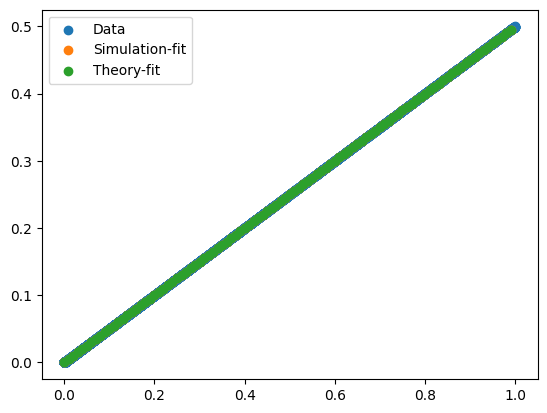

In [1363]:
x = arange(0, 1, dt)
plt.scatter((speed**2), force, label = "Data")
plt.scatter(x, lineararray[0]*x + lineararray[1], label = "Simulation-fit")
plt.scatter(x, (m/r)*x, label = "Theory-fit")
plt.legend(loc="best")
plt.show()

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implment the *for-loop over object configurations*, but thiis time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

In [1364]:
m = 10
v = 2

r = (((np.random.random(100000))*4)+1)
force = np.zeros(len(r))

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

In [1365]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

### <font color='Red'> For-loop over Radii considered </font>

In [1366]:
for i in range(len(r)):
    experiment = Experiment(r[i])  # Create an instance of your Experiment class
    experiment.run()  # Run the experiment
    force[i] = (m*(v**2))/(experiment.output)  # Access the output and calculate force

### <font color='Red'> Plot the Radii vs. Force graph </font>

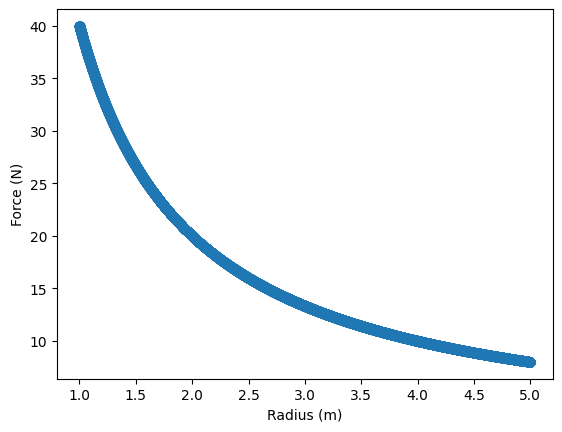

In [1367]:
plt.scatter(r, force)
plt.xlabel("Radius (m)")
plt.ylabel("Force (N)")
plt.show()

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

In [1368]:
def linearfit(x,y):
  A = np.vstack([x, np.ones(len(x))]).T
  return np.linalg.lstsq(A, y)[0]

lineararray = linearfit(1/r, force)

<ipython-input-1368-62438d3411fd>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, y)[0]


### <font color='Red'> Get the theoritical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

In [1369]:
print("Theoretical mass/R = " + str(m*v**2) + " kg*m^2/s^2")
print("Experimental mass/R = " + str(lineararray[0]) + " kg*m^2/s^2")

percentdiff = sqrt(((m*v**2)-lineararray[0])**2)/(m*v**2)
print("Experimental percent difference from theoretical prediction = " + str(percentdiff*100) + "%")

Theoretical mass/R = 40 kg*m^2/s^2
Experimental mass/R = 39.99999999999999 kg*m^2/s^2
Experimental percent difference from theoretical prediction = 1.7763568394002505e-14%


#### <font color='Red'> Let's plot this linear function (in F vs. 1/R): data, simulation-fit, and theory-fit </font>

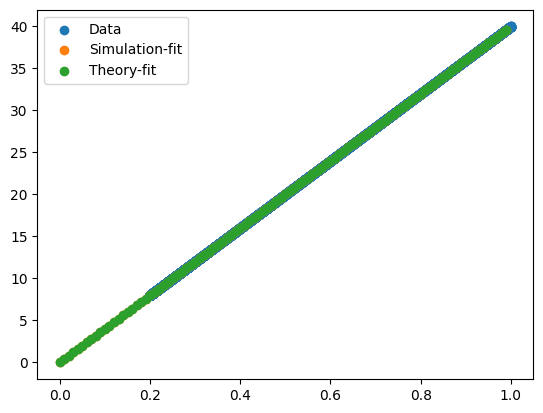

In [1370]:
x = arange(0, 1, dt)
plt.scatter((1/r), force, label = "Data")
plt.scatter(x, lineararray[0]*x + lineararray[1], label = "Simulation-fit")
plt.scatter(x, (m*v**2)*x, label = "Theory-fit")
plt.legend(loc="best")
plt.show()

#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>